In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import nltk
import string
import unicodedata
import seaborn as sns

# from unidecode import unidecode

In [3]:
#read csv file
data = pd.read_csv('dataset/train.csv')
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
# # check version number
import imblearn
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# example of random oversampling to balance the class distribution
# define dataset
X =  data.drop(columns=['toxic'],axis=1)

# target
y =  data["toxic"]
# summarize class distribution
print(Counter(y))
# define oversampling strategy
undersample = RandomUnderSampler(sampling_strategy='auto')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution

# define oversampling strategy
undersample = RandomUnderSampler(sampling_strategy='auto')

# define oversampling strategy
undersample = RandomUnderSampler(sampling_strategy=1)
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
print(Counter(y_over))

Counter({0: 144277, 1: 15294})
Counter({0: 15294, 1: 15294})


In [5]:
undersampling_df = X_over
undersampling_df['toxic'] = y_over.tolist()
undersampling_df

,id,comment_text,severe_toxic,obscene,threat,insult,identity_hate,toxic
0,c436fcdd4acc928a,naw i am fine see you later guys you rock ) ha...,0,0,0,0,0,0
1,17bb9f8b0e2ff008,LOL\n\nREDDIT PWN YOU LMAO. UnknownTales1,0,0,0,0,0,0
2,e86ae38d7ff0c1ff,You jumped the gun a bit too early - that's my...,0,0,0,0,0,0
3,cb1fcb465bd93930,"No way, Mercedez PWNZ!!",0,0,0,0,0,0
4,140cb8dc1570e423,I noticed it doesn't mention if the real Presi...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
30583,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",0,1,0,1,1,1
30584,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,0,0,0,1,0,1
30585,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,0,1,0,1,0,1
30586,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",0,0,0,1,0,1


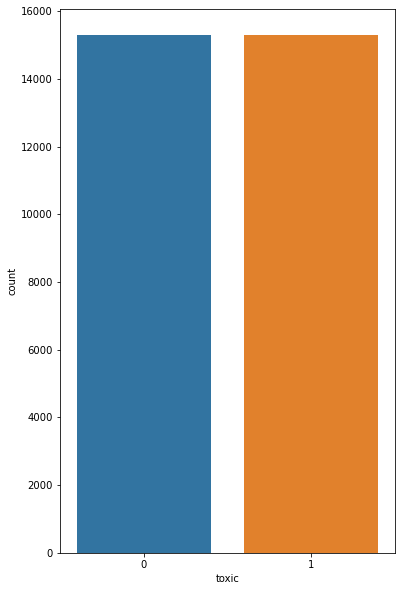

In [6]:
#toxic
plt.figure(figsize=(6, 10))
sns.countplot(undersampling_df['toxic'])

In [7]:
undersampling_df.to_csv('undersampling_cleaned.csv')

# Take a sample of the dataframe

In [19]:
toxic_df= undersampling_df[undersampling_df['toxic']==1].sample(n = 5000)
toxic_df

,id,comment_text,severe_toxic,obscene,threat,insult,identity_hate,toxic
16557,230d04ae609f98e4,You confessed to be an animalfucker \n\nYou fi...,0,1,0,1,0,1
20871,99e7fbef712fd454,Prediction Timetable is getting bloated \n\nWh...,0,1,0,1,0,1
20291,88f9931bbf26aed8,Aflis Major Dick Head \n\nIt is funny that you...,0,1,0,1,0,1
21429,a9657ead2f714542,Stop fucking harrassing me!,0,1,0,0,0,1
19494,71e8e95f6177fad1,Go and fall off a cliff and die you pathetic b...,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
29824,813d8e41b6b4c33d,BOLLOCKS TO ALL OF YOU\nBOLLOCKS TO ALL OF YOU...,0,0,0,0,0,1
24876,156ff0a421ad3e44,"YOU'RE NOT AN ADMINISTRATOR, YOU ARE A FAGGOT ...",0,1,0,1,0,1
16825,2a29777bdf204e9c,Why do you edit User:Mikenorton talk pages \n...,0,0,0,0,0,1
28001,c3d743abd2d71301,Fuck you \n\nHow dare you revert me edit.,0,1,0,1,0,1


In [20]:
# take a sample of 5k for toxic data
non_toxic_df = undersampling_df[undersampling_df['toxic']==0].sample(n = 5000)
non_toxic_df

,id,comment_text,severe_toxic,obscene,threat,insult,identity_hate,toxic
9062,b569be03cf34f714,"""\n\n As you know there are guidelines discour...",0,0,0,0,0,0
4342,6b3d3794e4d2919b,"""The name of the person to hold this office wa...",0,0,0,0,0,0
14746,ceda6618e70f7f14,"""According to this paper from University of Le...",0,0,0,0,0,0
9200,0f869ad70a1faf12,Many thanks for the welcome \nI have returned ...,0,0,0,0,0,0
14417,e26dc66db74f8bd1,See Talk:Steven Gerrard#Gerrard's Height?.,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4303,6c6dd6e1d19f9bdb,Your question on Wikipedia:Village pump (misce...,0,0,0,0,0,0
10253,684782f3802bf225,Surely what the problem is is that players had...,0,0,0,0,0,0
881,027cad1f6a076629,Here draper does state that he has... []\n( ),0,0,0,0,0,0
12849,f849e3d0bad31156,"""\nI note that there's no """"address"""" and """"ph...",0,0,0,0,0,0


In [21]:
new_data = pd.DataFrame()
new_data = pd.concat([toxic_df, non_toxic_df])
new_data

,id,comment_text,severe_toxic,obscene,threat,insult,identity_hate,toxic
16557,230d04ae609f98e4,You confessed to be an animalfucker \n\nYou fi...,0,1,0,1,0,1
20871,99e7fbef712fd454,Prediction Timetable is getting bloated \n\nWh...,0,1,0,1,0,1
20291,88f9931bbf26aed8,Aflis Major Dick Head \n\nIt is funny that you...,0,1,0,1,0,1
21429,a9657ead2f714542,Stop fucking harrassing me!,0,1,0,0,0,1
19494,71e8e95f6177fad1,Go and fall off a cliff and die you pathetic b...,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
4303,6c6dd6e1d19f9bdb,Your question on Wikipedia:Village pump (misce...,0,0,0,0,0,0
10253,684782f3802bf225,Surely what the problem is is that players had...,0,0,0,0,0,0
881,027cad1f6a076629,Here draper does state that he has... []\n( ),0,0,0,0,0,0
12849,f849e3d0bad31156,"""\nI note that there's no """"address"""" and """"ph...",0,0,0,0,0,0


In [22]:
undersampling_df.to_csv('10krows_undersampling_cleaned.csv')